### Student Details

# Student Name: Vilohit Keshava Murthy Achar

# Student ID: 23077751

# Task 2: Probability Theory

## Options

1. NORMAL DISTRIBUTION FOR BIRTH WEIGHT
(CONTINUOUS RANDOM VARIABLE)-        
   Using the Python numpy package, I have generated continuous random numbers with a normal distribution to imitate a birth weight experiment using a continuous random variable with a normal distribution. And have plotted the birth weights using a histogram.

2. BERNOULLI DISTRIBUTION FOR EMAIL SPAM DETECTION.
(DISCRETE RANDOM VARIABLE):-
In order to replicate an experiment on email spam detection that used a discrete random variable with a Bernoulli distribution,I created a  Python code. And have used a histogram to plot the birth weights.

## Approach
1. In this code, I defined variables such as the mean birth weight, standard deviation, and the number of simulations.
In order to get a random number, I utilized a loop, and I also used a bar graphing tool to get the desired result.


2.In this code I have a simple logic of arithmetic. Where is the number of spam email is equal to the subtration of total numebr of email and number vaild email.





TASK 2:- PROBABILITY DISTRIBUTION


NORMAL DISTRIBUTION FOR BIRTH WEIGHT

(CONTINUOUS RANDOM VARIABLE)

Simulated Expected Birth Weight: 3.496098539654777 kilograms
Simulated Standard Deviation of Birth Weight: 0.5033569205891674 kilograms
Simulated Expected Random Number: 3.496098539654777 kilograms
Simulated Standard Deviation of Random Number: 0.5033569205891674 kilograms


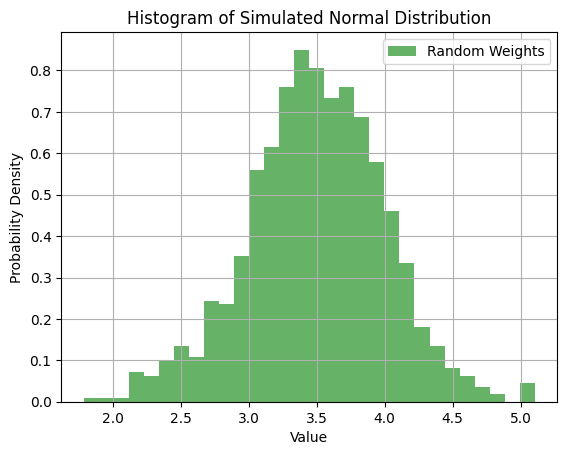

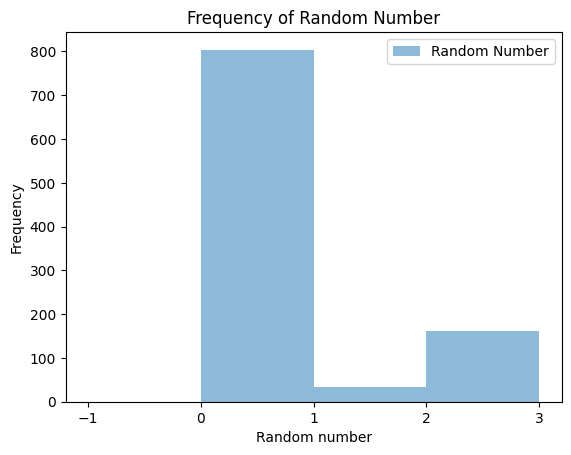

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Parameter for the normal distribution

mean_birth_weight = 3.5
std_dev_birth_weight = 0.5
num_simulations = 1000

# Initialization
random_weights = []
random_numbers = []

random_weights = np.random.normal(mean_birth_weight, std_dev_birth_weight, num_simulations)
for number in random_weights:
  if number < 1.5:
    random_number = -1
  elif 1.5 <= number <= 2.5:
    random_number = 1
  elif 2.6 <= number <= 4.0:
    random_number = 0
  else:
    random_number = 2
  random_numbers.append(random_number)

expected_birth_weight = np.mean(random_weights)
std_deviation_birth_weight = np.std(random_weights, ddof=1)
expected_random_numbers = np.mean(random_numbers)
std_deviation_random_numbers = np.std(random_numbers, ddof=1)

print("Simulated Expected Birth Weight:", expected_birth_weight, "kilograms")
print("Simulated Standard Deviation of Birth Weight:", std_deviation_birth_weight, "kilograms")
print("Simulated Expected Random Number:", expected_birth_weight, "kilograms")
print("Simulated Standard Deviation of Random Number:", std_deviation_birth_weight, "kilograms")

# Plot the histogram of random weights
plt.hist(random_weights, bins=30, density=True, alpha=0.6, color='g', label='Random Weights')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Histogram of Simulated Normal Distribution')
plt.legend()
plt.grid(True)
plt.show()

# Plot frequency of random numbers
plt.hist(random_numbers, bins=range(-1, 4), alpha=0.5, label="Random Number")
plt.xlabel("Random number")
plt.ylabel("Frequency")
plt.title("Frequency of Random Number")
plt.xticks(range(-1, 4))
plt.legend()
plt.show()

BERNOULLI  DISTRIBUTION FOR EMAIL SPAM DETECTION.


(DISCRETE RANDOM VARIABLE)

Simulated 100 email detections:
Number of spam detections: 17
Number of not spam detections: 83
Proportion of spam detections: 0.17
Proportion of not spam detections: 0.83


Text(0.5, 1.0, 'Email Spam Detetion')

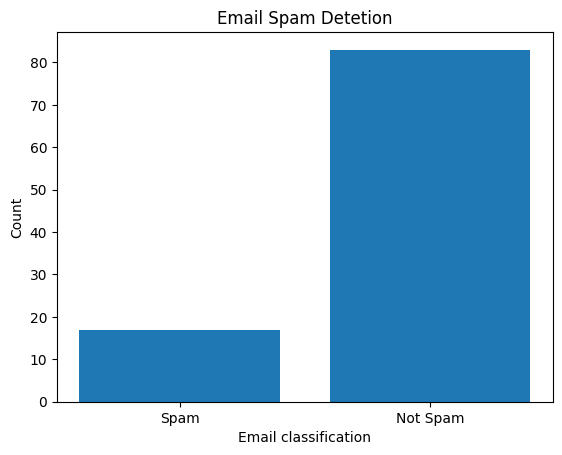

In [ ]:
import numpy as np

probability_spam = 0.25  # Example: 25% chance of spam
num_simulations = 100

email_detections = np.random.choice([0, 1], size=num_simulations, p=[1 - probability_spam, probability_spam])

num_spam = np.sum(email_detections)
num_not_spam = num_simulations - num_spam

proportion_spam = num_spam / num_simulations
proportion_not_spam = num_not_spam / num_simulations

# Print the results
print(f"Simulated {num_simulations} email detections:")
print(f"Number of spam detections: {num_spam}")
print(f"Number of not spam detections: {num_not_spam}")
print(f"Proportion of spam detections: {proportion_spam:.2f}")
print(f"Proportion of not spam detections: {proportion_not_spam:.2f}")


categories = ['Spam', 'Not Spam']
counts = [num_spam,num_not_spam]
plt.bar(categories,counts)
plt.xlabel('Email classification')
plt.ylabel('Count')
plt.title('Email Spam Detetion')

# Task 3: Naive Bayes Classifier

Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [ ]:
from pandas.core.describe import pd
# import dependencies
import numpy as np
import pandas

# Read the data from the .csv, using the first row as the headers of the data
data = pd.read_csv('/var/lock/001122.csv',header=0)

# Show just the first few samples so we know it's read correctly
data.head(n=3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


### Visualise

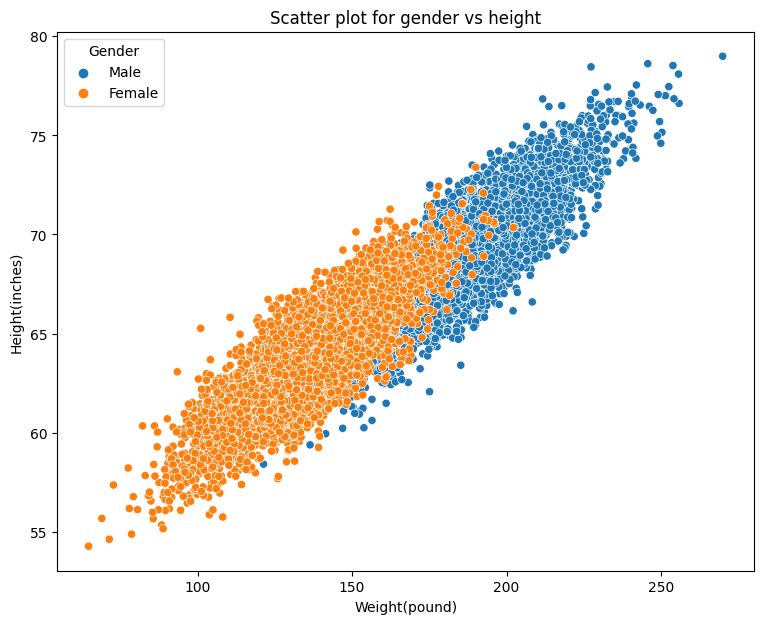

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,7))
sns.scatterplot(x="Weight",y="Height",hue="Gender",data= data)
plt.title("Scatter plot for gender vs height")
plt.xlabel("Weight(pound)")
plt.ylabel("Height(inches)")
plt.legend(title="Gender")
plt.show()


###### Discuss: Do you think there is resonable separation?

### Features and labels
The aim is to predict the gender of the person based on characteristics such as height, weight. So we call what we want to predict the "label" and the characteristics the "features". This will be covered more later in the module, but is a good enough understanding for now.

In [ ]:
X = data.iloc[:,1:3] # X is the features in our dataset
y = data.iloc[:,0]   # y is the Labels in our dataset

### Train/Test Split

We have a bunch of data from the csv file. What we need to do is decide what of that data we will use to train the algorithm, and what of that data will be used to see how good the result is. More on this later in the module, but you can't use the same data you train with to test the outcome, as it will naturally fit that very well, but you won't catch things like overfitting.

There is some science to this, but for now we will randomly select one third for testing, and the rest for training.

In [ ]:
#training  data
x=data.drop('Gender',axis=1)
y=data['Gender']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

### Train the algorithm
We won't go into the details here, but we will use a Gaussian Naive Bayesian. Use GaussianNB from sklearn to train the model. The Gaussian is needed as we're dealing with sparse, continuous data

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

### Test the algorithm
Using the test data

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = gnb.predict(x_test)
y_pred
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.8915151515151515


### Plot the random samples

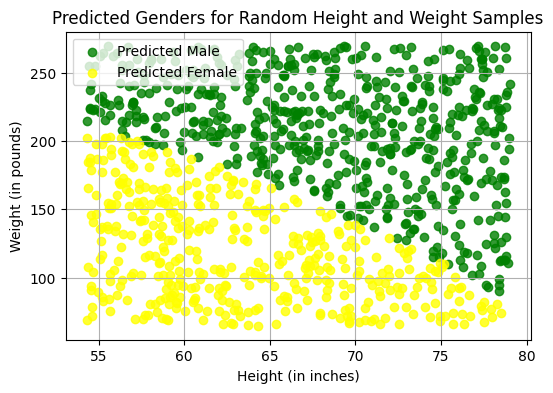

In [ ]:
height_range = (data['Height'].min(), data['Height'].max())
weight_range = (data['Weight'].min(), data['Weight'].max())

import numpy as np
random_heights = np.random.uniform(height_range[0], height_range[1], 1000)
random_weights = np.random.uniform(weight_range[0], weight_range[1], 1000)

random_samples = pd.DataFrame({'Height': random_heights, 'Weight': random_weights})
predicted_genders = gnb.predict(random_samples)

random_samples['Gender'] = predicted_genders

male_predicted = random_samples[random_samples['Gender'] == 'Male']
female_predicted = random_samples[random_samples['Gender'] == 'Female']

plt.figure(figsize=(6,4))
plt.scatter(male_predicted['Height'], male_predicted['Weight'], color='green', label='Predicted Male', alpha=0.8)
plt.scatter(female_predicted['Height'], female_predicted['Weight'], color='yellow', label='Predicted Female', alpha=0.8)
plt.xlabel('Height (in inches)')
plt.ylabel('Weight (in pounds)')
plt.title('Predicted Genders for Random Height and Weight Samples')
plt.legend()
plt.grid(True)
plt.show()



                          
  
# Reinforcement Learning to Transform Healthcare:-


Healthcare is undeniably one of the most vital and intricate industries, where decisions can have profound impacts on people's lives. Recently, Reinforcement Learning (RL) has gained popularity in the healthcare sector, offering innovative solutions to enhance patient care, optimize treatments, and reduce costs. RL, a subset of artificial intelligence (AI), teaches computers to make decisions akin to human judgment by learning from their mistakes. This essay aims to explore the intriguing applications of RL in healthcare using clear and straightforward language.

One of the foremost challenges in healthcare is the development of personalized treatment plans for patients. Variations in individual responses to therapies can significantly influence treatment outcomes. Reinforcement Learning comes to the rescue by analyzing patient data, including medical histories, genetic information, and current symptoms, to recommend the most efficient course of treatment. Over time, these therapy recommendations evolve and improve based on the outcomes of prior patients.

Imagine a scenario where a patient with a rare disease requires a specific medication. RL can assist medical professionals in fine-tuning the dosage and treatment regimen based on the patient's response, thereby minimizing side effects and maximizing the chances of recovery.

Early detection is paramount for successful disease management. Radiologists can employ RL in medical imaging to aid in the diagnosis of conditions such as cancer. Unlike traditional methods, RL quickly learns to identify patterns in X-rays, MRIs, and CT scans, allowing for the detection of anomalies or potential health issues.

For instance, an RL-powered algorithm can analyze thousands of mammograms, identifying subtle signs of breast cancer and facilitating earlier, more effective treatment.

The process of developing new medications is time-consuming and expensive. RL can significantly expedite drug discovery by predicting the interactions between potential compounds and biological targets. It can simulate millions of interactions and prioritize the most promising candidates for further study, potentially expediting the creation of life-saving drugs.

Consider a scenario where researchers utilize RL to identify a substance with the potential to treat a deadly infection. By rapidly testing potential interactions in a virtual environment, they can expedite the identification of an effective treatment.

Robotic surgery has gained popularity in recent years due to its ability to perform precise and minimally invasive procedures. Reinforcement Learning can enhance surgical robots by providing real-time guidance, thereby improving their skills. These surgical robots become more precise and adept at delicate procedures as they learn from the movements and choices of experienced surgeons.

Imagine a complex cardiac surgery performed with the assistance of a robotic system driven by RL. The robot can anticipate the surgeon's actions, make suggestions, and even take over certain tasks, enhancing the safety and effectiveness of the procedure.

Reinforcement Learning can also help healthcare organizations achieve cost and resource-saving improvements. By analyzing patient data and hospital operations, it is possible to predict patient admissions, allocate beds more efficiently, and optimize staff scheduling. The result is shorter wait times, reduced costs, and more efficient healthcare delivery.

As a simplified example, RL can assist a hospital in determining the busiest times in its emergency room, enabling it to allocate resources and staff appropriately to ensure prompt patient care.

In summary, Reinforcement Learning is revolutionizing the field of medicine by providing personalized treatment plans, improving disease diagnosis, accelerating drug discovery, enhancing surgical techniques, and optimizing healthcare operations. These applications not only enhance patient outcomes but also improve the overall effectiveness and efficiency of healthcare delivery. With ongoing technological advancements, the future of healthcare promises to be healthier and more efficient, thanks to the integration of RL.



# References:-

- Sutton, R. S., & Barto, A. G. (2018). Reinforcement Learning: An Introduction. MIT Press.

- Silver, D., Huang, A., Maddison, C. J., Guez, A.(2016). Mastering Chess and Shogi by Self-Play with a General Reinforcement Learning Algorithm.

- Liu, Z., & Sun, Q. (2018). Application of deep reinforcement learning in power and energy systems: A review and a new perspective. IEEE

